In [16]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers

import matplotlib.pyplot as plt

#### Descargamos los datos de imdb - Keras

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
train_data[0]

In [5]:
train_labels[0]

1

In [6]:
# Diccionario de palabras
word_index = imdb.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
word_index

##### Vectorizamos haciendo one-hot encoding

In [9]:
def vectorizar(sequences, dim=10000):
	results = np.zeros((len(sequences), dim))
	for i, sequences in enumerate(sequences):
		results[i, sequences]= 1
	return results

In [10]:
# Transformar la data para ingresar a keras
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [11]:
# Convertir las etiquetas a flotante
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
# Preparamos la data para validación
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

#### Creamos el modelo

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compilamos el modelo 1

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['accuracy'])

#### Entrenamos el modelo 1

In [25]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))


Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5346 - accuracy: 0.7767 - val_loss: 0.4019 - val_accuracy: 0.8704
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3301 - accuracy: 0.8899 - val_loss: 0.3307 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2416 - accuracy: 0.9182 - val_loss: 0.2976 - val_accuracy: 0.8814
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1954 - accuracy: 0.9340 - val_loss: 0.2771 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1610 - accuracy: 0.9463 - val_loss: 0.2807 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1394 - accuracy: 0.9572 - val_loss: 0.2875 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1170 - accuracy: 0.9646 - val_loss: 0.3169 - val_accuracy: 0.8757
Epoch 8/20
30

#### Analizamos resultados

In [26]:
# Analizamos resultados
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

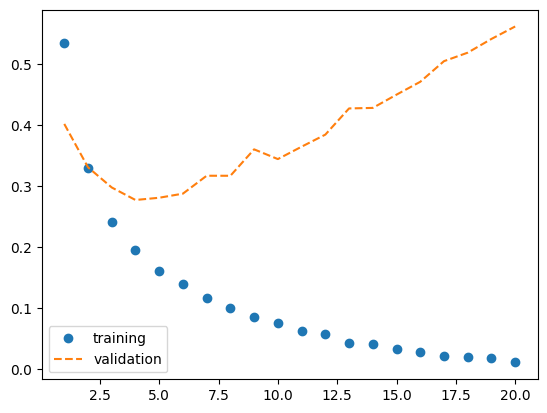

In [27]:
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='validation')
plt.legend()
plt.show()

In [28]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.6056 - accuracy: 0.8589


[0.6055728197097778, 0.8588799834251404]